Name: Harsh Mishra Roll no: 21102B0027 CMPN B

##XGB Classifier

In [ ]:
pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-Score: 0.9411764705882353
ROC AUC: 0.9510317720275139


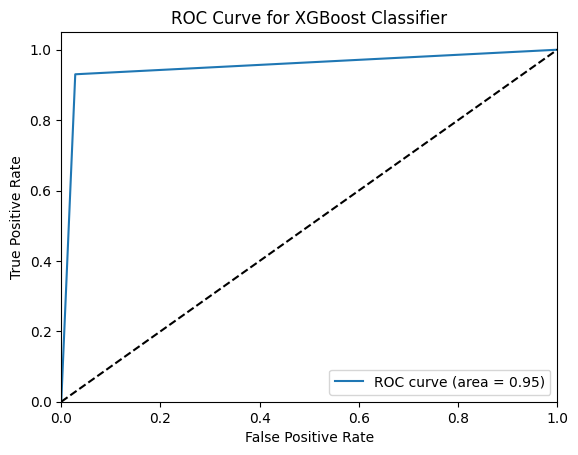

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # Optional for ROC curve plotting

# Fetch the WDBC dataset using ucimlrepo (handle error)
try:
    from ucimlrepo import fetch_ucirepo
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
    X = breast_cancer_wisconsin_diagnostic.data.features
    y = breast_cancer_wisconsin_diagnostic.data.targets
except ImportError:
    print("ucimlrepo not installed. Install using 'pip install ucimlrepo'.")
    # Provide alternative data loading instructions if needed

# Encode target variable (y)
le = LabelEncoder()
y = le.fit_transform(y)  # Convert string labels to numerical labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBClassifier model
model = XGBClassifier(use_label_encoder=False)  # Avoid label encoding warning
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()  # Uncomment to display the ROC curve

##XGB Regression

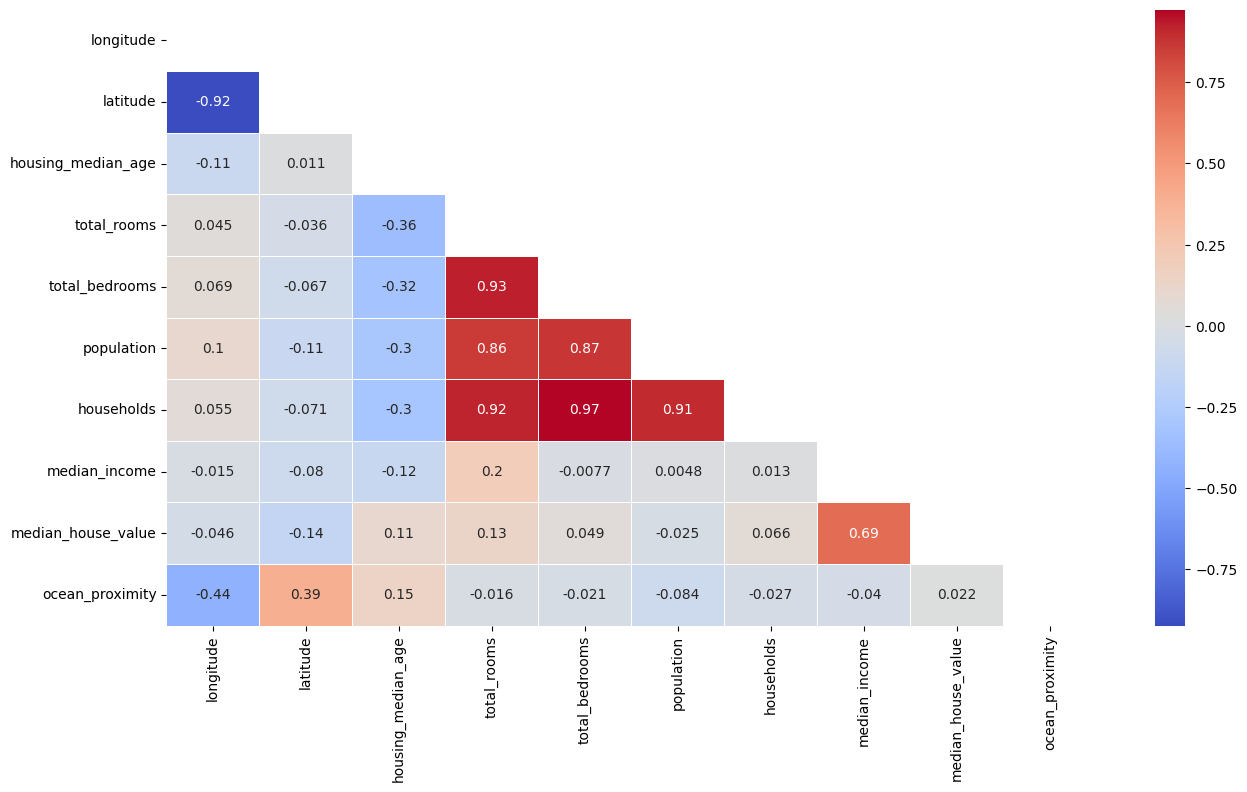

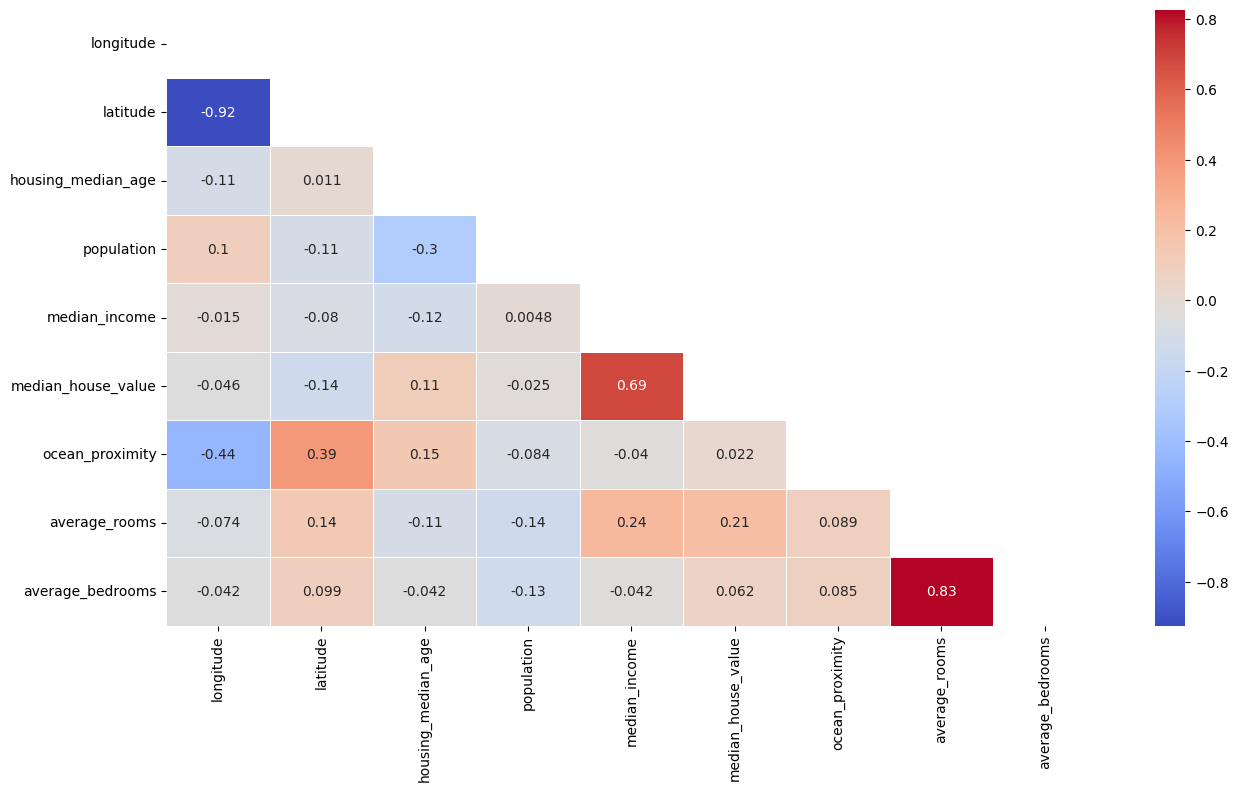

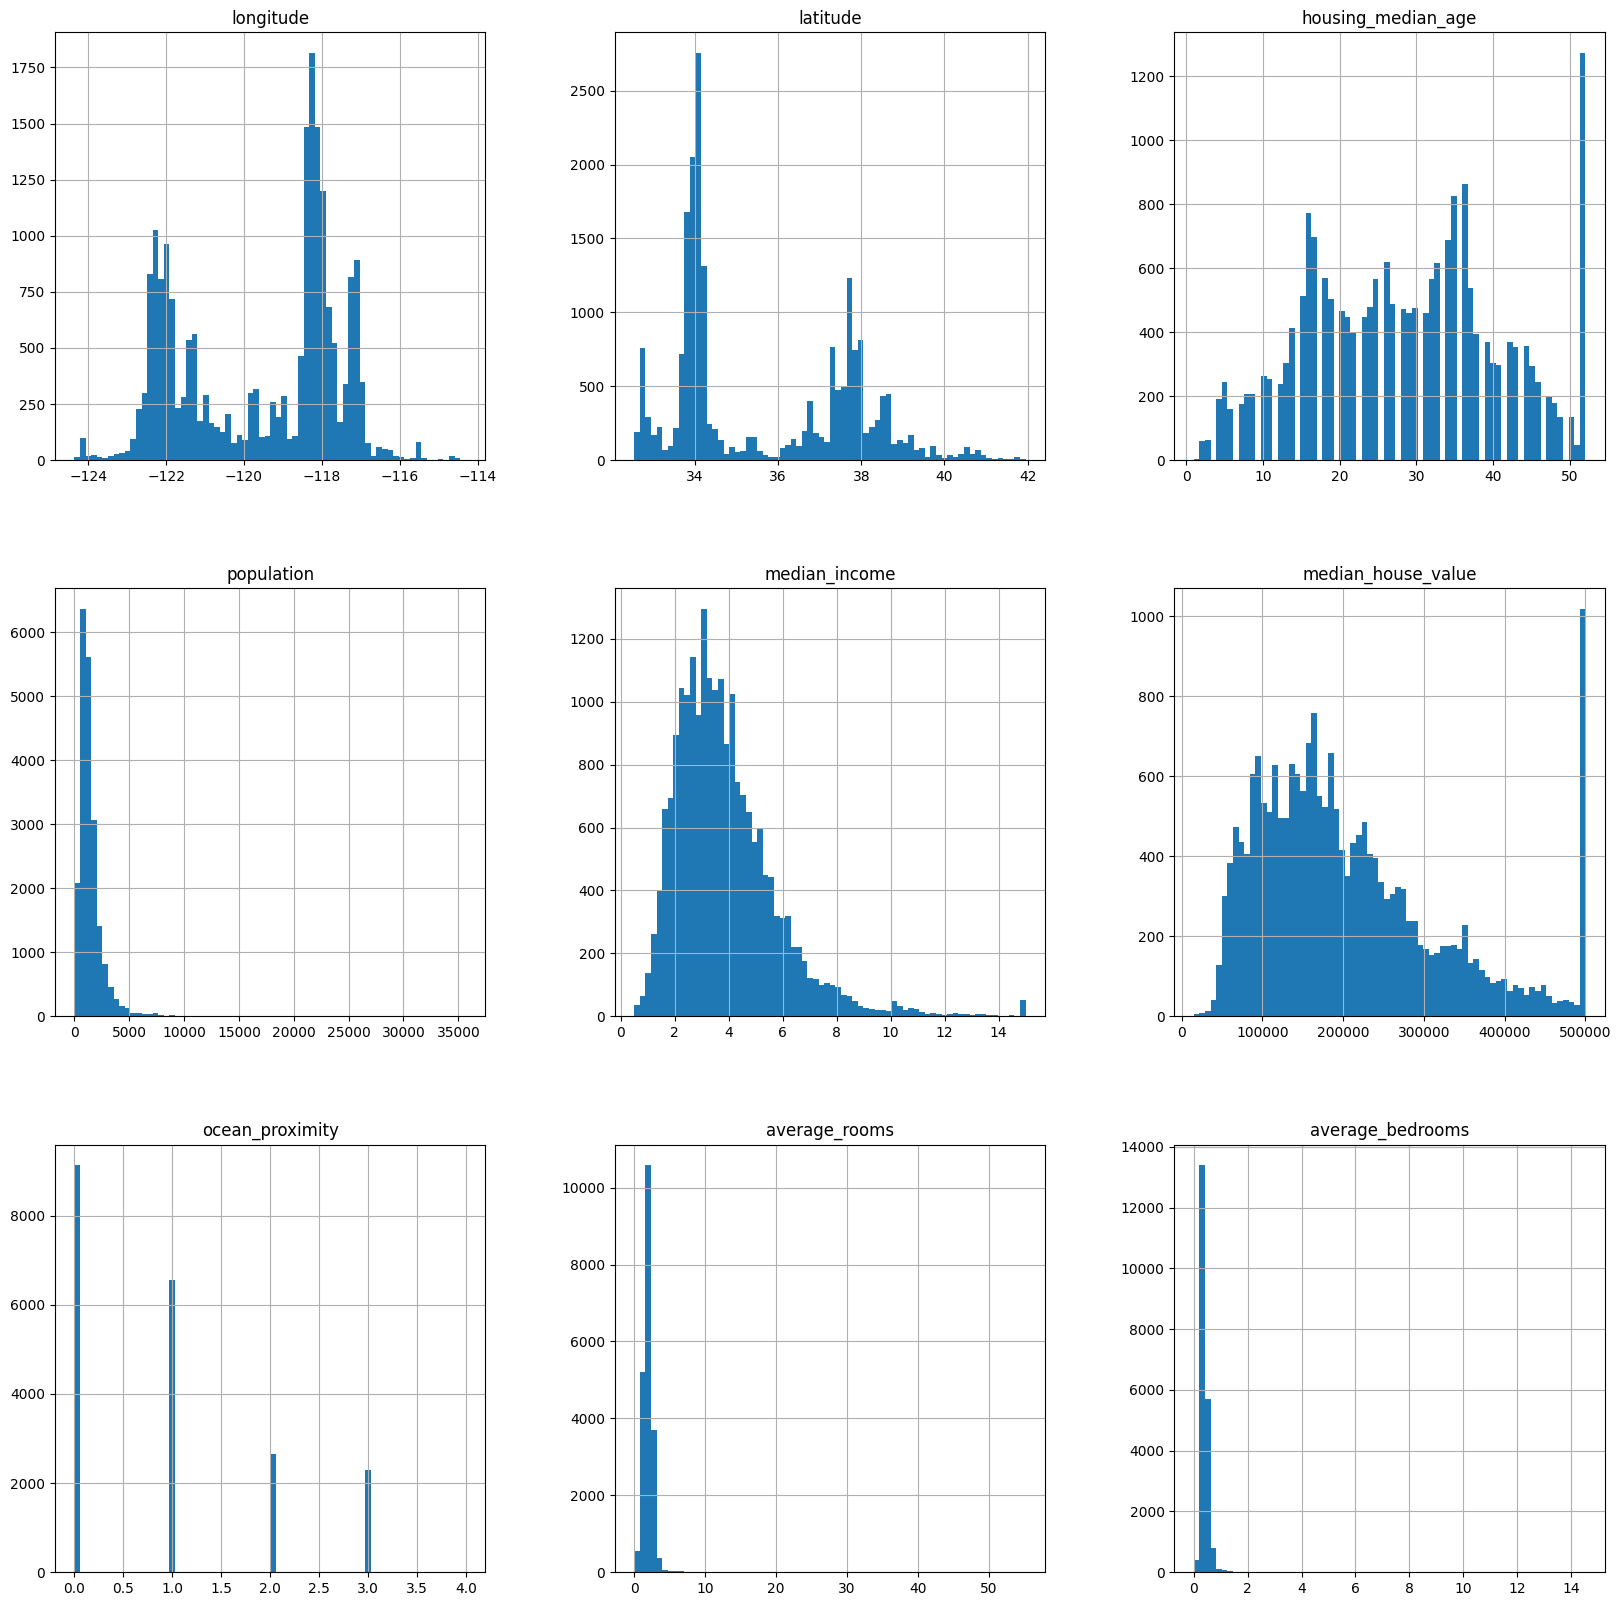

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


the R squared of the xgboost method is: 0.8216760827012799
Mean Squared Error: 1778065249.9326463
R-squared: 0.8216760827012799


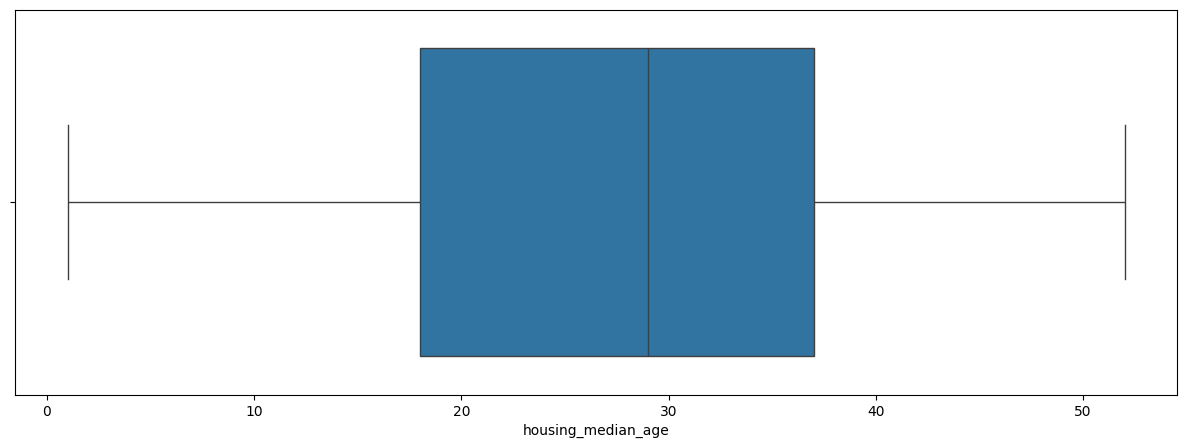

<Figure size 500x500 with 0 Axes>

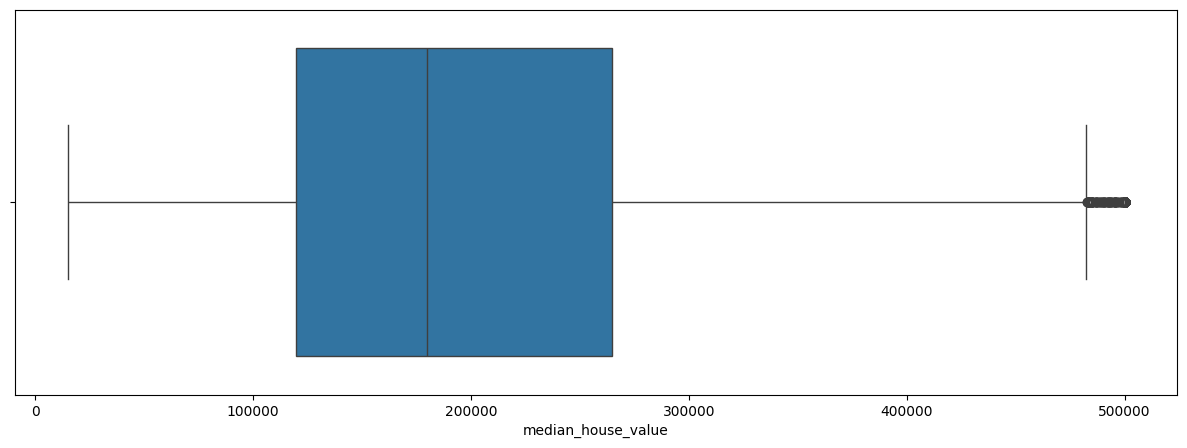

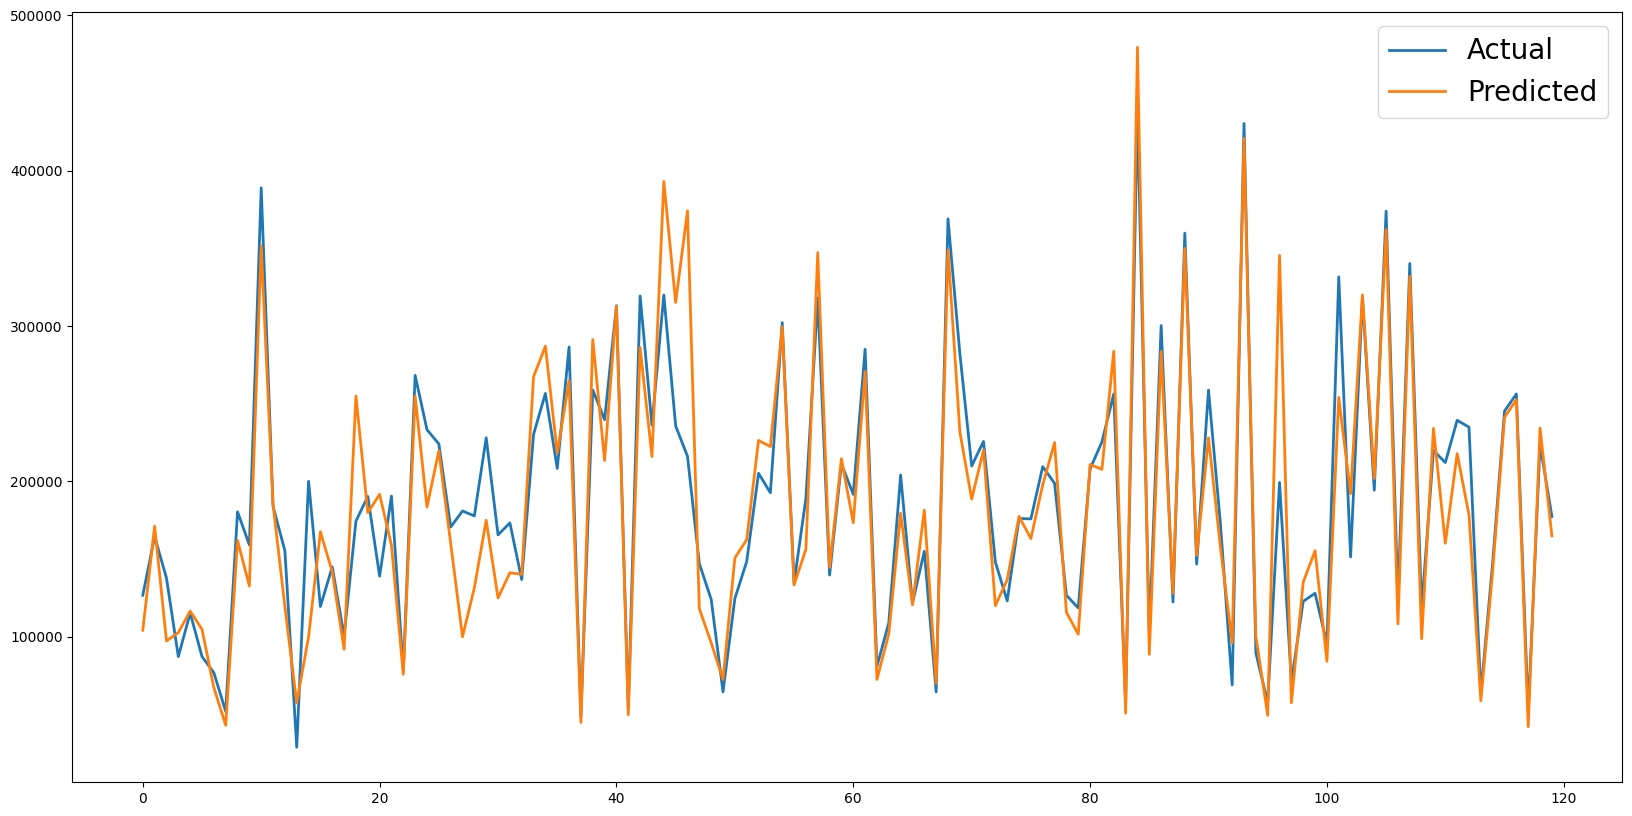

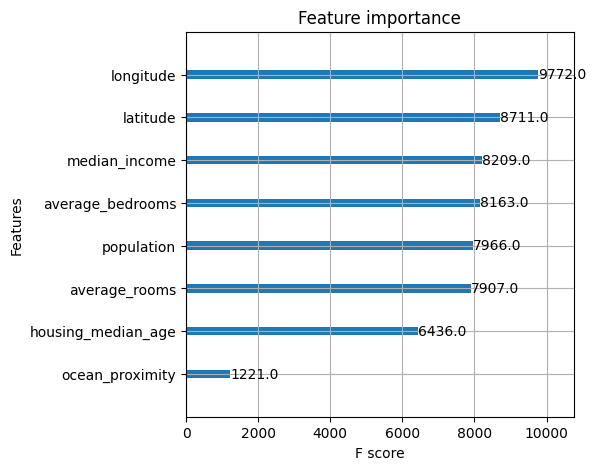

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

Accuracy: 82.88% (0.75%)


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("housing.csv")

# Data exploration and cleaning
list(df)
df.describe()
df.count()
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df['ocean_proximity'].value_counts()

def map_age(age):
    if age == '<1H OCEAN':
        return 0
    elif age == 'INLAND':
        return 1
    elif age == 'NEAR OCEAN':
        return 2
    elif age == 'NEAR BAY':
        return 3
    elif age == 'ISLAND':
        return 4

df['ocean_proximity'] = df['ocean_proximity'].apply(map_age)

# Correlation heatmap (before feature engineering)
plt.figure(figsize=(15, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=0.5, annot=True, mask=mask, cmap='coolwarm')

# Feature engineering
df.drop('households', axis=1, inplace=True)
df['average_rooms'] = df['total_rooms'] / df['population']
df['average_bedrooms'] = df['total_bedrooms'] / df['population']
df.drop('total_rooms', axis=1, inplace=True)
df.drop('total_bedrooms', axis=1, inplace=True)

# Correlation heatmap (after feature engineering)
plt.figure(figsize=(15, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=0.5, annot=True, mask=mask, cmap='coolwarm')

# Data visualization
df.hist(bins=70, figsize=(20, 20))
plt.show()

# Outlier detection and handling
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['housing_median_age'])
plt.figure()
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['median_house_value'])
df = df.loc[df['median_house_value'] < 500001, :]

# Feature selection and target variable
X = df[['longitude', 'latitude', 'housing_median_age', 'population', 'median_income', 'ocean_proximity', 'average_rooms', 'average_bedrooms']]
Y = df['median_house_value']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# XGBoost model training and evaluation
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=2000)
xg_reg.fit(X_train, Y_train)

y_pred2 = xg_reg.predict(X_test)
grp = pd.DataFrame({'prediction': y_pred2, 'Actual': Y_test})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)
plt.figure(figsize=(20, 10))
plt.plot(grp[:120], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Calculate MSE and R-squared
mse = mean_squared_error(Y_test, y_pred2)
r2 = r2_score(Y_test, y_pred2)

print('the R squared of the xgboost method is:', r2xgb)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# K-Fold cross-validation with shuffling
kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Set shuffle to True
results = cross_val_score(xg_reg, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))